<div style="background-color: #f7f7f7; border-left: 4px solid #6c757d; padding: 20px 30px; margin-bottom: 20px; border-radius: 8px;">
    <h1 style="color: #333; font-family: 'Arial', sans-serif; text-align: center; font-size: 28px;">Final Machine learning Course Project</h1>
    <h3 style="color: #555; font-family: 'Arial', sans-serif; text-align: center; font-size: 20px;">Machine Learning Course (4032)</h3>
    <div style="text-align: center; margin: 15px 0;">
        <h5 style="color: #777; font-family: 'Arial', sans-serif; font-size: 16px;">Instructor: <strong style="color: #333;">Dr. Mehran Safayani</strong></h5>
        <h5 style="color: #777; font-family: 'Arial', sans-serif; font-size: 16px;">Name: <strong style="color: #333;">Sepehr Ebadi</strong></h5>
        <h5 style="color: #777; font-family: 'Arial', sans-serif; font-size: 16px;">Student Number: <strong style="color: #333;">9933243</strong></h5>
    </div>
</div>


# **Q1 - A**

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)       
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.expand_frame_repr', False)

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_df['Age'] = titanic_df["Age"].fillna(titanic_df["Age"].median())

Age is a continuous numerical feature and may have outliers. With 177 missing data, the median is a conservative and suitable choice as it does not distort the distribution and is less sensitive to outliers.

In [7]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])

Embarked is a categorical feature with only 2 missing data. The mode is the most common embarkation port, and with such a low percentage of missing values, it has little impact on the model.

In [8]:
titanic_df = titanic_df.drop(columns=['Cabin'])

687 out of 891 of the Cabin data is missing, which is a very high percentage. Filling this amount with methods like median, mode, or even model-based imputation could generate inconsistent data and add significant noise to the model.

In [9]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
titanic_df = titanic_df.drop(columns=["Ticket"])

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
titanic_encoded = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

In [14]:
titanic_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,True,False,False


Sex_feamale, Embarked_C is implicit and remove it.(drop_first=True)

In [15]:
titanic_encoded['Sex_male'] = titanic_encoded['Sex_male'].astype(int)
titanic_encoded['Embarked_Q'] = titanic_encoded['Embarked_Q'].astype(int)
titanic_encoded['Embarked_S'] = titanic_encoded['Embarked_S'].astype(int)

In [16]:
titanic_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = titanic_encoded.drop(columns=['Survived', 'Name'])  
y = titanic_encoded['Survived']

# Split data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [21]:
X_train_scaled_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.453066,-1.614136,1.253641,-0.470722,-0.479342,-0.078684,0.724310,-0.303355,0.592489
1,1.113874,-0.400551,-0.477284,-0.470722,-0.479342,-0.377145,0.724310,-0.303355,0.592489
2,-0.254275,0.813034,0.215086,-0.470722,-0.479342,-0.474867,0.724310,-0.303355,0.592489
3,1.000836,0.813034,-0.246494,0.379923,-0.479342,-0.476230,0.724310,-0.303355,0.592489
4,1.425702,0.813034,-1.785093,2.931860,2.048742,-0.025249,-1.380624,-0.303355,0.592489


## Plot 1: Distribution of Normalized Age

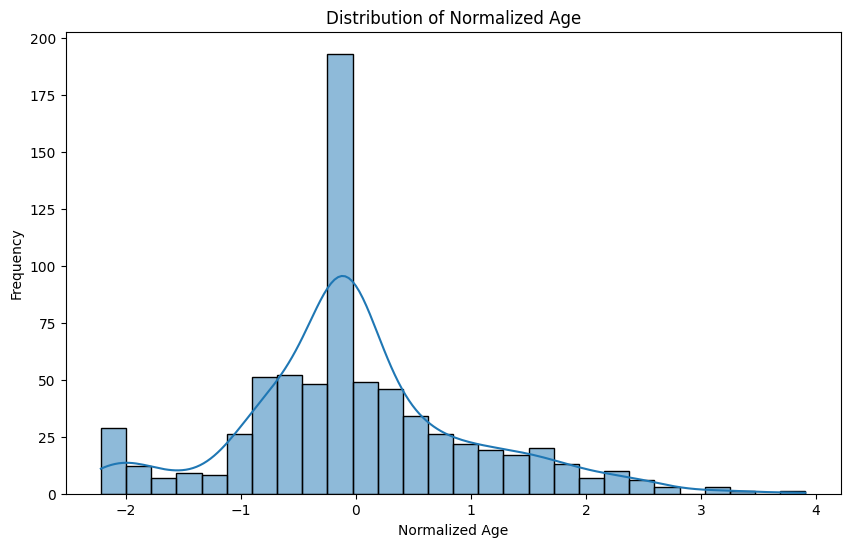

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train_scaled_df['Age'], kde=True)
plt.title('Distribution of Normalized Age')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')
plt.show()

## Plot 2: Boxplot for comparing Fare by Survival


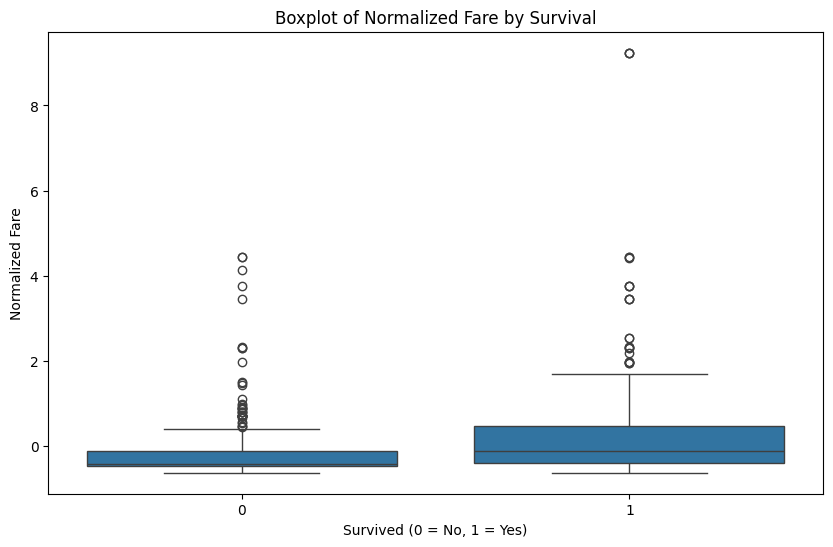

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train.reset_index(drop=True), y=X_train_scaled_df['Fare'])
plt.title('Boxplot of Normalized Fare by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Normalized Fare')
plt.show()

## Plot 3: Correlation Matrix for main features

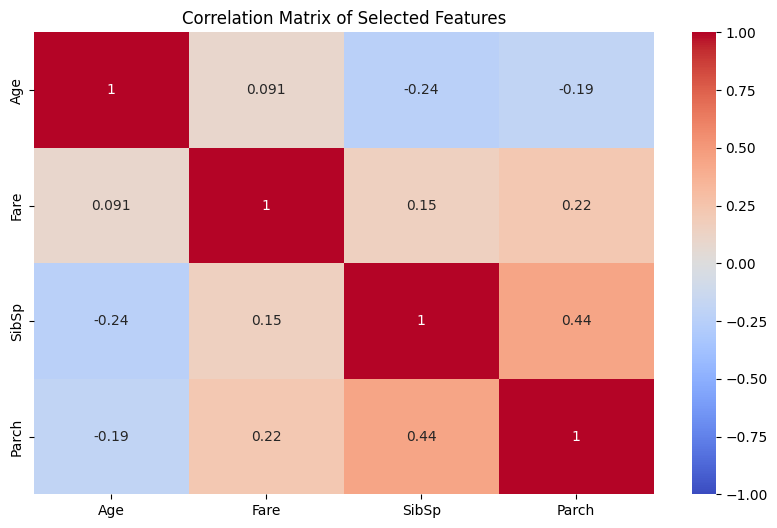

In [24]:
plt.figure(figsize=(10, 6))
correlation_matrix = X_train_scaled_df[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

## **Q1 - B**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [26]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': range(1, 11) 
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 11)}, return_train_score=True,
             scoring='accuracy')

In [27]:
results = grid_search.cv_results_
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

In [28]:
best_max_depth = grid_search.best_params_['max_depth']
best_max_depth

3

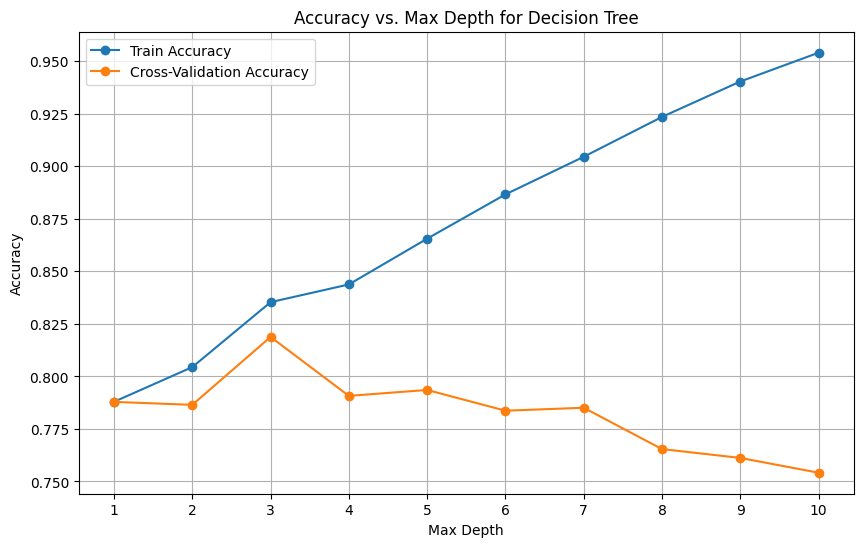

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(param_grid["max_depth"], mean_train_scores, label='Train Accuracy', marker='o')
plt.plot(param_grid["max_depth"], mean_test_scores, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.xticks(param_grid["max_depth"])
plt.show()

## Train model with best depth

In [30]:
best_dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
best_dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [31]:
feature_importance = best_dt_model.feature_importances_
feature_names = X_train.columns

In [32]:
import numpy as np

In [33]:
indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[indices]
sorted_feature_names = feature_names[indices]

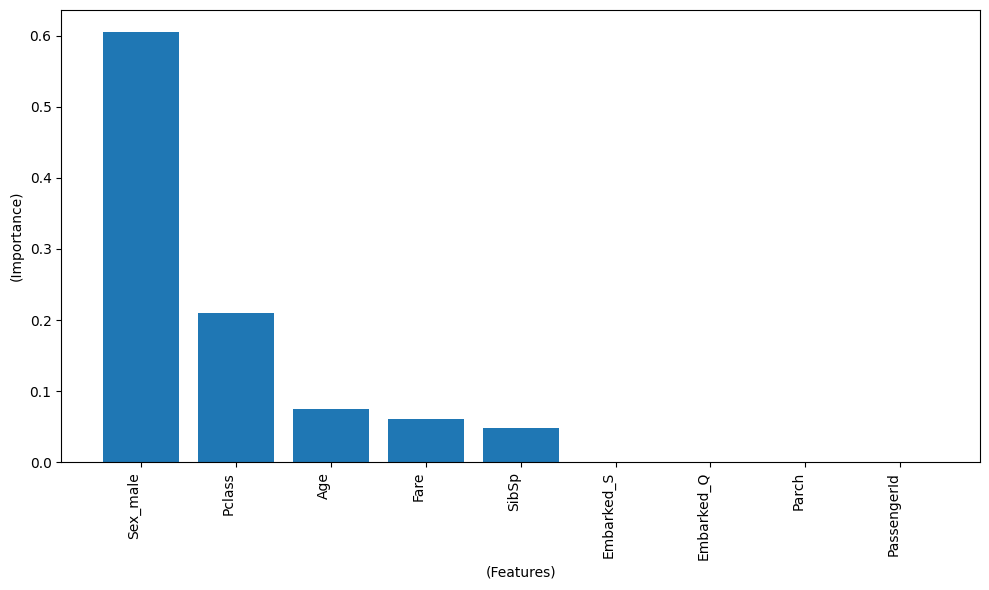

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_feature_importance)
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90, ha='right')
plt.xlabel('(Features)')
plt.ylabel('(Importance)')
plt.tight_layout()
plt.show()

In [35]:
print(f"Best tree depth: {best_max_depth}")
print("Top important features:")
for name, importance in zip(sorted_feature_names[:3], sorted_feature_importance[:3]):
    print(f"{name}: {importance:.4f}")

Best tree depth: 3
Top important features:
Sex_male: 0.6057
Pclass: 0.2095
Age: 0.0754


## **My Analysis :**
The Decision Tree model was trained with the best depth of 3, indicating a suitable balance between complexity and generalizability. The feature importance analysis showed that `Sex_male` with 60.57% has the greatest impact on predicting survival, consistent with the Titanic's women and children first policy. `Pclass` with 20.95% and `Age` with 7.54% were the second and third most important factors, reflecting the role of ticket class and age in survival chances. Other features like `Fare` or `Embarked` had lower importance, which is justified by the limited depth and focus on key factors. These results align with Titanic's historical data and indicate a reasonable model performance.

In [36]:
y_pred = best_dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy): {accuracy:.4f}")
print(f"(Precision): {precision:.4f}")
print(f"(Recall): {recall:.4f}")
print(f"(F1-scor): {f1:.4f}")

(Accuracy): 0.7989
(Precision): 0.7969
(Recall): 0.6892
(F1-scor): 0.7391


In [37]:
from sklearn.tree import plot_tree

In [38]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

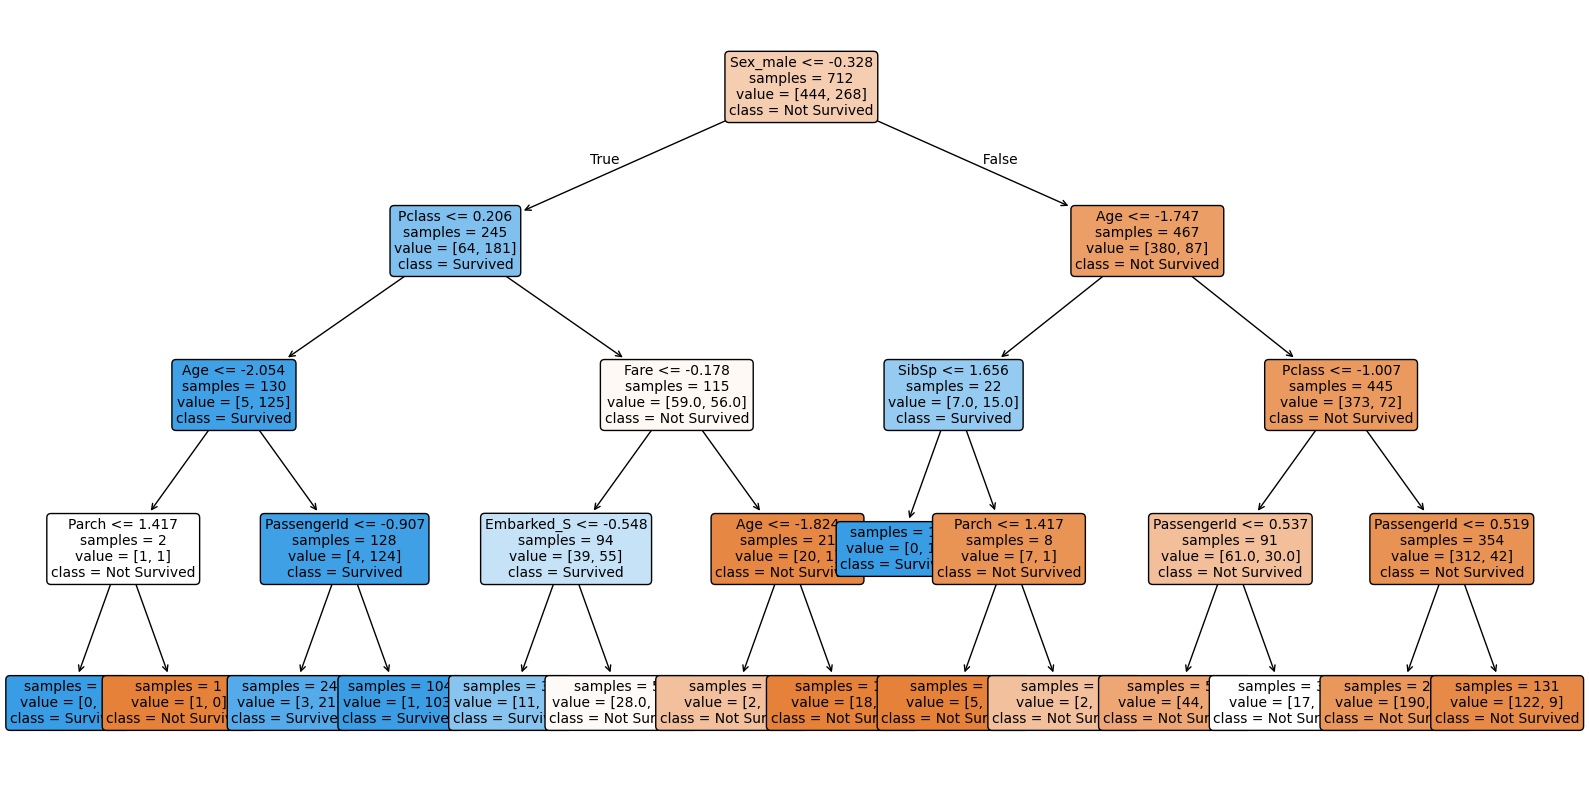

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, impurity=False, fontsize=10)
plt.show()

<div style="background-color: #f7f7f7; border-left: 4px solid #6c757d; padding: 20px 30px; margin-bottom: 20px; border-radius: 8px;">
    <h3 style="color: #555; font-family: 'Arial', sans-serif; text-align: center; font-size: 20px;">Question 2</h3>
</div>


# **Q2**

In [40]:
mall_df = pd.read_csv("Mall_Customers.csv")

In [41]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
mall_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [43]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [46]:
selected_features = mall_df[['Annual Income (k$)', 'Spending Score (1-100)']]
X = selected_features.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (k$)_scaled', 'Spending Score (1-100)_scaled'])

In [47]:
X_scaled_df.head()

,Annual Income (k$)_scaled,Spending Score (1-100)_scaled
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Plot scatter with original data

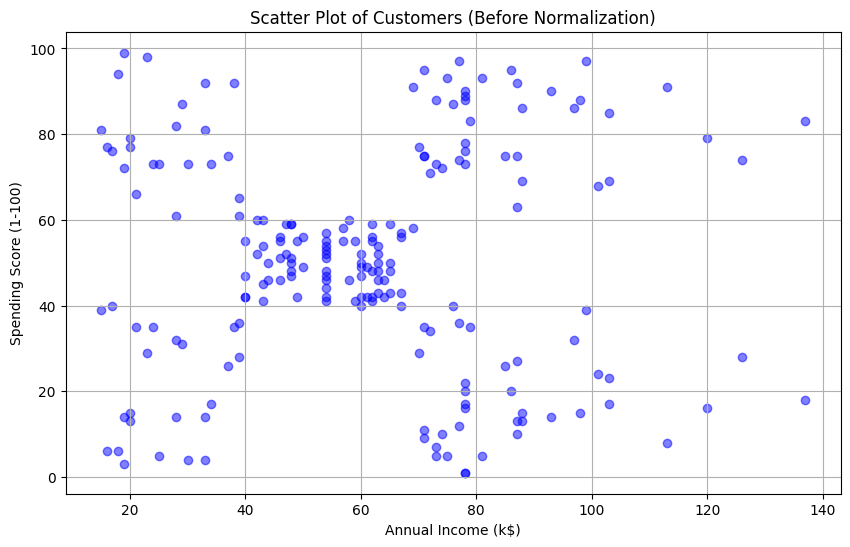

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(mall_df['Annual Income (k$)'], mall_df['Spending Score (1-100)'], color='blue', alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Customers (Before Normalization)')
plt.grid(True)
plt.show()

## Plot with normalized data

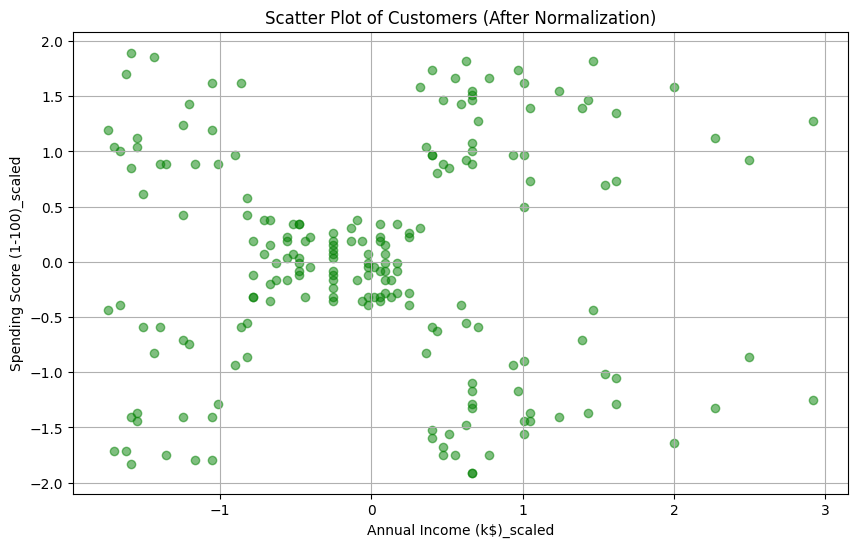

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled_df['Annual Income (k$)_scaled'], X_scaled_df['Spending Score (1-100)_scaled'], color='green', alpha=0.5)
plt.xlabel('Annual Income (k$)_scaled')
plt.ylabel('Spending Score (1-100)_scaled')
plt.title('Scatter Plot of Customers (After Normalization)')
plt.grid(True)
plt.show()

In [50]:
from sklearn.cluster import KMeans

In [51]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

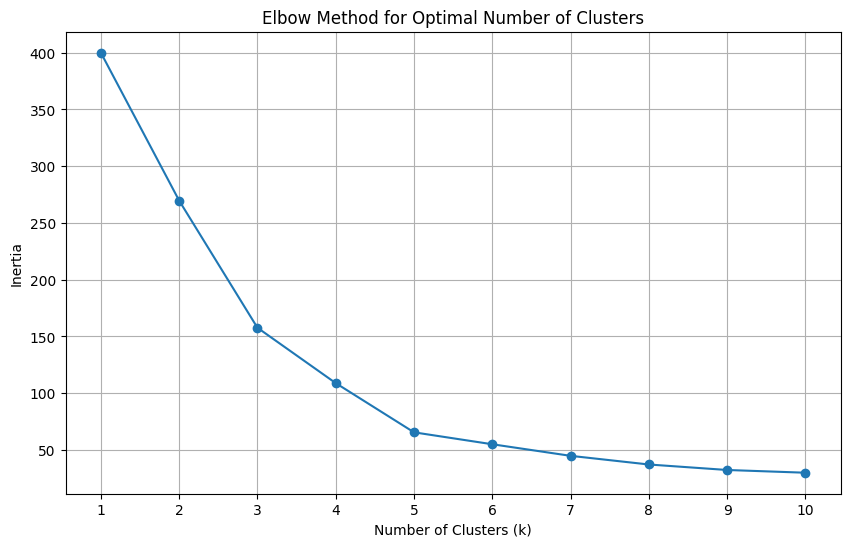

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

## elbow point = 5

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [54]:
mall_df['Cluster'] = cluster_labels

In [55]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [56]:
# Extract cluster centers and convert to original scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

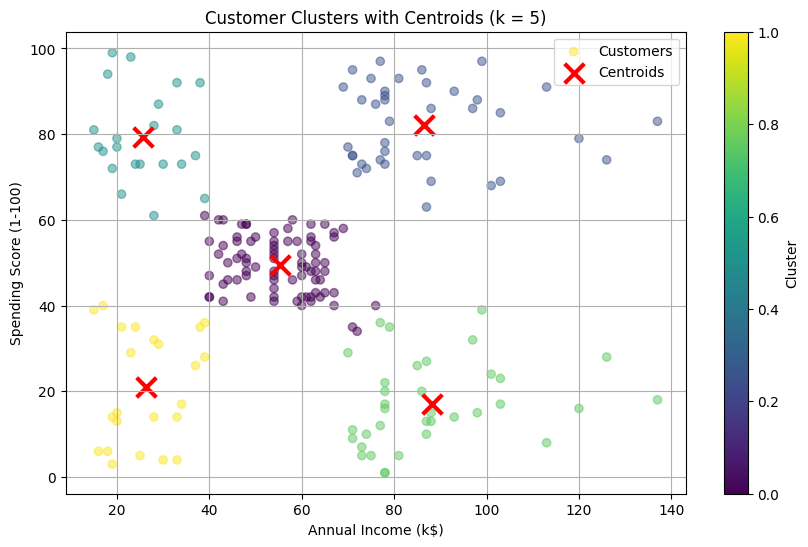

In [57]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(mall_df['Annual Income (k$)'], mall_df['Spending Score (1-100)'], c=mall_df['Cluster'], cmap='viridis', alpha=0.5, label='Customers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters with Centroids (k = 5)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
cluster_counts = mall_df['Cluster'].value_counts().sort_index()

print("Number of members in each cluster:")
print(cluster_counts)

Number of members in each cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


## Calculate mean features for each cluster

In [59]:
cluster_summary = mall_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


## Describe general characteristics of each cluster

In [60]:
for cluster in range(5):
    income_mean = cluster_summary.loc[cluster, 'Annual Income (k$)']
    score_mean = cluster_summary.loc[cluster, 'Spending Score (1-100)']
    if income_mean > 70 and score_mean > 50:
        desc = "Customers with high income and high Spending Score"
    elif income_mean > 70 and score_mean <= 50:
        desc = "Customers with high income and low Spending Score"
    elif income_mean <= 70 and score_mean > 50:
        desc = "Customers with medium to low income and high Spending Score"
    else:
        desc = "Customers with medium to low income and low Spending Score"
    print(f"Cluster {cluster} ({cluster_counts[cluster]} members): {desc}")

Cluster 0 (81 members): Customers with medium to low income and low Spending Score
Cluster 1 (39 members): Customers with high income and high Spending Score
Cluster 2 (22 members): Customers with medium to low income and high Spending Score
Cluster 3 (35 members): Customers with high income and low Spending Score
Cluster 4 (23 members): Customers with medium to low income and low Spending Score


In [61]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [62]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

In [63]:
print(f"Silhouette Score for k = 5: {silhouette_avg:.4f}")

Silhouette Score for k = 5: 0.5547


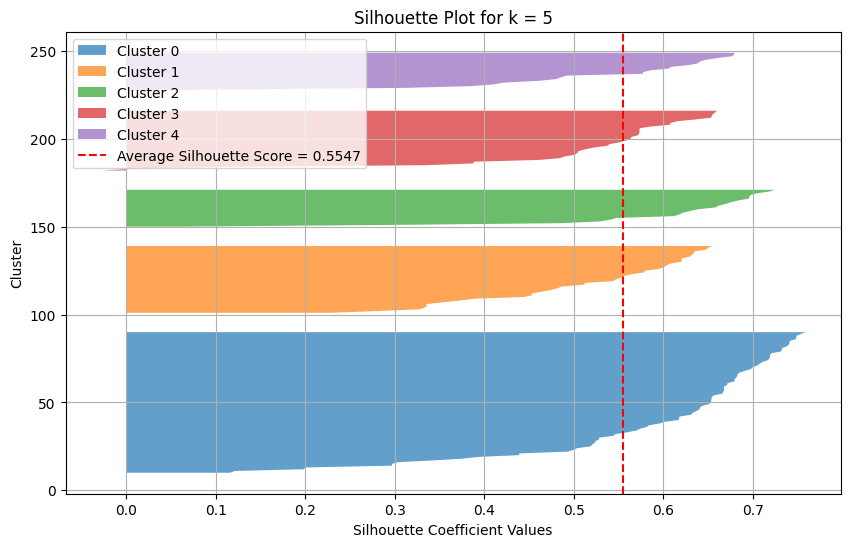

In [64]:
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(5):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + cluster_silhouette_vals.shape[0]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Average Silhouette Score = {silhouette_avg:.4f}')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster')
plt.title('Silhouette Plot for k = 5')
plt.legend()
plt.grid(True)
plt.show()